In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
pd.options.display.max_columns = 99

### Intro to data

In [2]:
col_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('data/imports-85.data', names=col_names)

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [5]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
                          'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

### Data cleaning


In [6]:
cars.replace('?', np.nan, inplace=True)

In [7]:
print(cars.shape, cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-nul

In [8]:
cars['normalized-losses'] = cars['normalized-losses'].astype(float)

In [9]:
#bore, stroke, horsepower, peak-rpm, price

In [10]:
cars['bore'] = cars['bore'].astype(float)

In [11]:
cars['stroke'] = cars['stroke'].astype(float)

In [12]:
cars['horsepower'] = cars['horsepower'].astype(float) 

In [13]:
cars['peak-rpm'] = cars['stroke'].astype(float)

In [14]:
cars = cars.dropna(subset=['price'])

In [15]:
cars = cars.fillna(cars.mean())

In [16]:
cars.drop('num-of-doors', axis=1, inplace=True)
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [17]:
cars = cars[continuous_values_cols]

In [18]:
cars['price'] = cars['price'].astype(float)

In [19]:
price_col = cars['price']
cars = (cars - cars.min()) / (cars.max() - cars.min())
cars['price'] = price_col

In [20]:
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.290476,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.290476,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.666667,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.633333,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.633333,0.138889,0.157895,17450.0


### Univariate model

In [21]:
def knn_train_test(col: str, target: str, df) -> float:
    size = df.shape[0] 
    train = df.iloc[0:int(size*0.75), :]
    test = df.iloc[int(size*0.75):, :]
    
    regressor = KNeighborsRegressor()
    regressor.fit(train[[col]], train[target])
    predictions = regressor.predict(test[[col]])
    
    mse = mean_squared_error(test[target], predictions)
    rmse = mse**0.5
    return rmse

In [22]:
columns = cars.columns.drop('price')

col_and_rmse = {col : 0 for col in columns}

In [23]:
for col in columns:
    col_and_rmse[col] = knn_train_test(col, 'price', cars)

In [24]:
{k: v for k, v in sorted(col_and_rmse.items(), key=lambda item: item[1])}

{'curb-weight': 2467.1015390375746,
 'highway-mpg': 2890.555952902961,
 'engine-size': 3544.400339557994,
 'city-mpg': 3635.9338845128937,
 'width': 3816.7939591068457,
 'horsepower': 3822.8885837703365,
 'wheel-base': 5600.275810224728,
 'compression-rate': 5676.281281220075,
 'height': 6575.68118251772,
 'length': 6931.079964572196,
 'stroke': 7674.212610871734,
 'peak-rpm': 7674.212610871734,
 'bore': 8173.167717238993,
 'normalized-losses': 9165.372097149993}

#### curb-weight column performed the best with default single feature knn regressor

In [25]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    last_train_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        predicted_labels = knn.predict(test_df[[train_col]])

        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

train_cols = cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


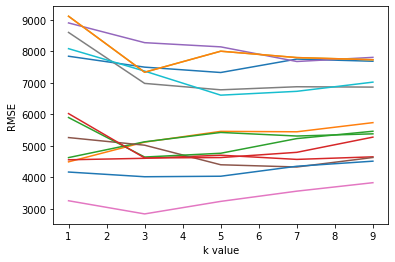

In [26]:
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

### Multivariate model

In [38]:
def multi_knn_train_test(cols: list, target: str, df, k=5) -> float:
    size = df.shape[0] 
    train = df.iloc[0:int(size*0.75), :]
    test = df.iloc[int(size*0.75):, :]
    
    regressor = KNeighborsRegressor(n_neighbors=k)
    regressor.fit(train[cols], train[target])
    predictions = regressor.predict(test[cols])
    
    mse = mean_squared_error(test[target], predictions)
    rmse = mse**0.5
    return rmse

In [29]:
cars.columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [ ]:
"""'curb-weight': 2467.1015390375746,
 'highway-mpg': 2890.555952902961,
 'engine-size': 3544.400339557994,
 'city-mpg': 3635.9338845128937,
 'width': 3816.7939591068457,
 'horsepower': 3822.8885837703365,
 'wheel-base': 5600.275810224728,
 'compression-rate': 5676.281281220075,
 'height': 6575.68118251772,
 'length': 6931.079964572196,
 'stroke': 7674.212610871734,
 'peak-rpm': 7674.212610871734,
 'bore': 8173.167717238993,
 'normalized-losses': 9165.372097149993"""

In [39]:
two_columns = multi_knn_train_test(['curb-weight', 'highway-mpg'], 'price', cars)
two_columns

3071.6276959854845

In [40]:
three_columns = multi_knn_train_test(['curb-weight', 'highway-mpg', 'engine-size'], 'price', cars)
three_columns

2739.67417112356

In [41]:
four_columns = multi_knn_train_test(['curb-weight', 'highway-mpg', 'engine-size', 'city-mpg'], 'price', cars)
four_columns

2332.5369899343

In [42]:
five_columns = multi_knn_train_test(['curb-weight', 'highway-mpg', 
                                     'engine-size', 'city-mpg', 'width'], 'price', cars)
five_columns

2203.571913338637

### Hyperparameter tunning

In [43]:
k_and_rmse = {k : 0 for k in range(1, 26)}

In [44]:
for i in range(1, 26):
    k_and_rmse[i] = multi_knn_train_test(['curb-weight', 'highway-mpg', 
                                     'engine-size', 'city-mpg', 'width'], 'price', cars, i)

Text(0, 0.5, 'RMSE')

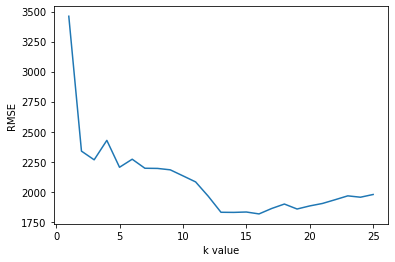

In [54]:
x = list(k_and_rmse.keys())
y = list(k_and_rmse.values())

plt.plot(x,y)
plt.xlabel('k value')
plt.ylabel('RMSE')

#### Model with 5 columns performed the best with number of neighbours of 14.

### Cross validation

In [60]:
from sklearn.model_selection import cross_val_score, KFold

In [62]:
kf = KFold(10, shuffle=True, random_state=1)

model = KNeighborsRegressor()

mses = cross_val_score(model, cars[['curb-weight', 'highway-mpg', 'engine-size', 'city-mpg', 'width']], 
                       cars['price'], scoring="neg_mean_squared_error", cv=kf)
rmses = np.sqrt(np.absolute(mses))
avg_rmse = np.mean(rmses)
std_rmse = np.std(rmses)
print(str(10), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))

10 folds:  avg RMSE:  3172.34957446239 std RMSE:  974.2638695512894
